In [3]:
a = np.array((1,2,3))
b = np.array(())

In [6]:
b.size > 0

False

In [7]:
import time
import picamera
#from IPython.display import display, update_display, display_jpeg, clear_output
#from IPython.display import Image as showimg
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
import SHSlib  as sh
import io

%load_ext autoreload
%autoreload 2

dips shit 


In [8]:
disp = sh.utils.LCD()
disp.Init()


In [ ]:
dir(camera)

In [45]:
with picamera.PiCamera(
        sensor_mode= 4,  # 1640x1232, full FoV, binning 2x2
        resolution= (640,480),
        #resolution= (320,240),        
        framerate= 10
) as camera:
    time.sleep(1)  # let the camera warm up and set gain/white balance
    camera.exposure_mode = 'off'
    camera.awb_mode = 'off'
    #camera.awb_gains = 2.5
    camera.awb_gains = 2
    
    camera.shutter_speed = int(6e6)
    camera.iso = 50
    output = np.zeros((480,640,3), dtype=np.uint8)
    while True:
        t1 = time.time_ns() 
        camera.capture(output,'rgb',use_video_port=True)
        t2 = time.time_ns()
        img = Image.fromarray(output,'RGB')
        img2 = np.copy(img)
        
        display(img,clear=True)    
        
        #clear_output(wait=True)
        #img.thumbnail((240,320))
        
        #disp.ShowImage(img)
        t3 = time.time_ns() - t2 
        print( "time frame ", np.round((t2-t1)/1e6) ,"ms time draw ", np.round(t3/1e6), "ms")

KeyboardInterrupt: 

In [20]:
type(a)

numpy.ndarray

In [19]:
type(np.NaN)

float

In [24]:
%time isinstance(np.NaN, float)

CPU times: user 23 µs, sys: 7 µs, total: 30 µs
Wall time: 55.8 µs


True

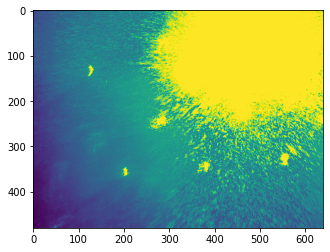

In [39]:
plt.imshow(img)

In [49]:
center

(array([         nan, 485.80198712, 144.13347375, 330.11324611,
        555.23181048, 383.22346661, 198.41722461]),
 array([         nan,  99.84299045, 115.21865693, 137.15616475,
        294.06571595, 322.61525147, 325.2960226 ]))

In [48]:
partners

(array([nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan]))

In [57]:
a = ref_center[1]
a
a[~np.isnan(a)]

array([ 98.53856047, 106.73174238, 283.7721904 , 318.68959696])

None


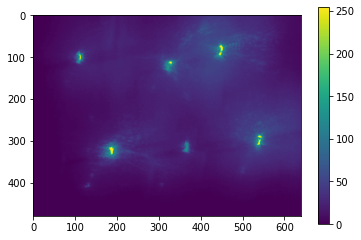

In [98]:
c = plt.imshow(np.uint8(img)); plt.colorbar(c)

In [120]:
%time cv.GaussianBlur(img_uint,(5,5),0.1,cv.BORDER_DEFAULT)

CPU times: user 13.5 ms, sys: 13.5 ms, total: 26.9 ms
Wall time: 8.49 ms


array([[0, 0, 0, ..., 7, 7, 7],
       [0, 0, 0, ..., 7, 7, 7],
       [0, 0, 0, ..., 7, 7, 6],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

CPU times: user 83.4 ms, sys: 0 ns, total: 83.4 ms
Wall time: 82.4 ms


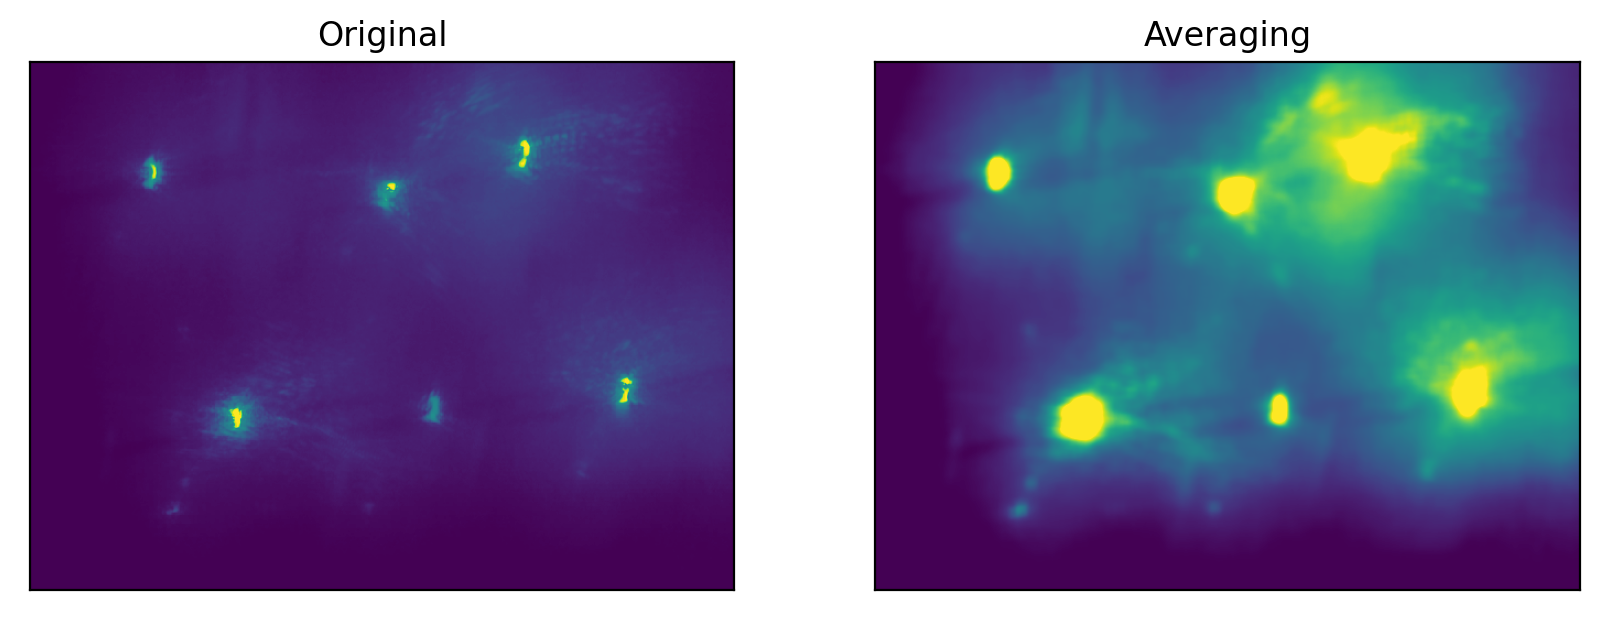

In [97]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
kernel = np.ones((10,10),np.float32)/25

img_uint = np.uint8(img)
%time dst = cv.filter2D(img_uint,-1,kernel)
plt.figure(figsize=(10,12),dpi= 200)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

CPU times: user 87.1 ms, sys: 64 ms, total: 151 ms
Wall time: 144 ms


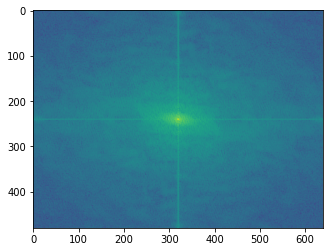

In [82]:

F = np.fft.fftshift(np.fft.fft2(img))
plt.imshow(np.log(np.abs(F)))

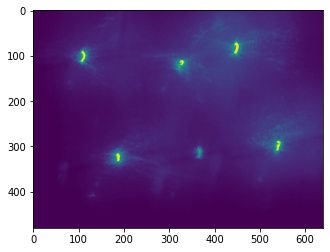

In [75]:
plt.imshow(img)

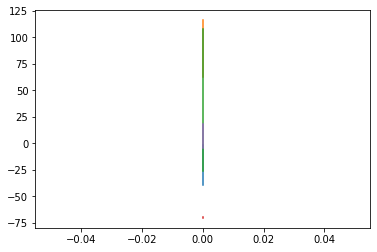

In [67]:
for x,y in zip(partners[0],partners[1]):
    plt.plot([0,0],[x,y],"")


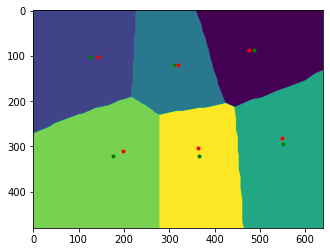

KeyboardInterrupt: 

In [87]:
with picamera.PiCamera(
        sensor_mode= 4,  # 1640x1232, full FoV, binning 2x2
        resolution= (640,480),
        #resolution= (320,240),        
        framerate= 10
) as camera:
    time.sleep(1)  # let the camera warm up and set gain/white balance
    camera.exposure_mode = 'off'
    camera.awb_mode = 'off'
    camera.awb_gains = 2.5

    camera.shutter_speed = int(6e6)
    camera.iso = 50
    output = np.zeros((480,640,3), dtype=np.uint8)
    
    
    # Get Ref Image
    camera.capture(output,'rgb',use_video_port=True)
    ref_img = Image.fromarray(output,'RGB')
    ref_img = np.mean(ref_img,2) 
    
    # Precess Ref Image
    ref_lables = sh.analyse.getSeperation(ref_img)
    ref_center = sh.analyse.getMomentum(ref_lables,ref_img) 
    
    while True:
        #t1 = time.time_ns() 
        camera.capture(output,'rgb',use_video_port=True)
        #t2 = time.time_ns()
        p_img = Image.fromarray(output,'RGB')
        img = np.mean(p_img,2)
        
        lables = sh.analyse.getSeperation(img)
        center = sh.analyse.getMomentum(lables, img) 
        
        partners = sh.analyse.getPartner(center, ref_center)
        
        
        display(p_img)
        #display(p_img,clear=True)    
        if not isinstance(lables, float):
            plt.imshow(lables)
            plt.plot(center[0],center[1],"r.")
            plt.plot(ref_center[0],ref_center[1],"g.")
            display(clear=True)
            plt.show()
                   
        
        #time.sleep(1)
        #img2 = np.copy(img)
        #clear_output(wait=True)
        #img.thumbnail((240,320))
        #disp.ShowImage(img)
        #t3 = time.time_ns() - t2 
        #print( "time frame ", np.round((t2-t1)/1e6) ,"ms time draw ", np.round(t3/1e6), "ms")

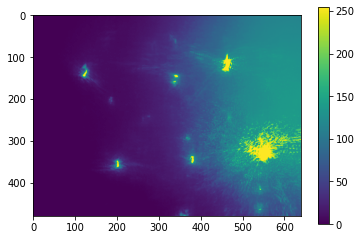

In [110]:
i = np.mean(img2,2)
c = plt.imshow(i); plt.colorbar(c)

CPU times: user 672 ms, sys: 69.1 ms, total: 741 ms
Wall time: 911 ms


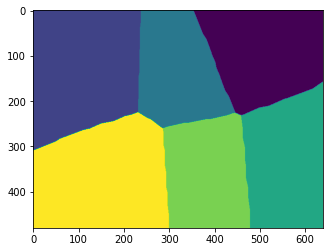

In [111]:
%time a = sh.analyse.getSeperation(i)
plt.imshow(a)

In [117]:
b[1]

array([         nan, 100.20107349, 122.22891327, 140.72154461,
       318.62446969, 334.5984629 , 332.87575143])

CPU times: user 66.4 ms, sys: 20 ms, total: 86.5 ms
Wall time: 84 ms


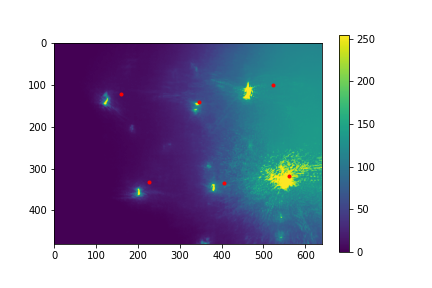

In [113]:
#b = sh.analyse.getMomentum(a, i,algorythm = "CV") 
%time b = sh.analyse.getMomentum(a, i) 

c = plt.imshow(i); plt.colorbar(c)
plt.plot(b[0],b[1],"r.")

img_buf = io.BytesIO()
plt.savefig(img_buf, format='png')
plt.close()
im = Image.open(img_buf)
im.show()


In [114]:
sh.analyse.getPartner(ref_b)

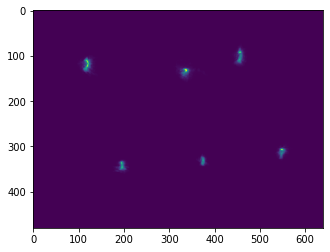

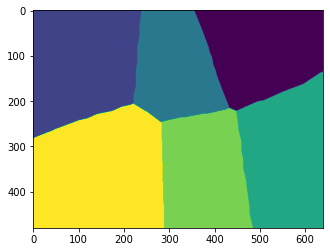

In [54]:
plt.imshow(sns)
plt.show()
plt.imshow(lab)
plt.show()

In [92]:
k = le.load()

CPU times: user 37 µs, sys: 14 µs, total: 51 µs
Wall time: 79.4 µs


In [98]:
k[1,1] = int(255)
k

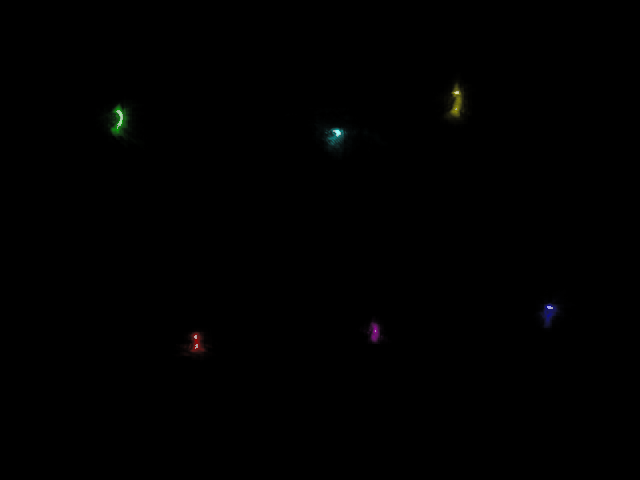

In [102]:
n = 100
sns = lab = 255*(i/np.max(i)) 
sns = np.uint8(i) # Sensor image

lab = 255*(a/np.max(a))
lab = np.uint8(lab) # Lables

le = Image.fromarray(np.dstack((lab,sns,sns)),'HSV')
le.convert(mode="RGB")